In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


# Titanic ML

The task is to infere the survival rate in a test set of tabular data about the Titanic disaster starting from a small labeled dataset.

## Preliminary Data Analysis

In [4]:
df = pd.read_csv("/kaggle/input/titanic/train.csv")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
survivedRatio = df['Survived'].sum() / len(df)
print(f"Global surival ratio: {survivedRatio}")
print(f"Global death ratio: {1 - survivedRatio}")

Global surival ratio: 0.3838383838383838
Global death ratio: 0.6161616161616161


In [8]:
df['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [9]:
# survival rate by class
df[['Pclass','Survived']].groupby('Pclass').mean().sort_values(by='Survived', ascending=False)

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [10]:
df['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [11]:
sexDistr = df['Sex'].value_counts() / len(df)
sexDistr

Sex
male      0.647587
female    0.352413
Name: count, dtype: float64

In [12]:
# Conditional probability P(Survived = 1 | Sex)
sexSurv = df[['Sex','Survived']].groupby('Sex').mean().sort_values(by='Survived', ascending=False)
sexSurv

,Survived
Sex,
female,0.742038
male,0.188908


In [13]:
# Missing values
df['Age'].isnull().sum() / len(df)

0.19865319865319866

<Axes: ylabel='Frequency'>

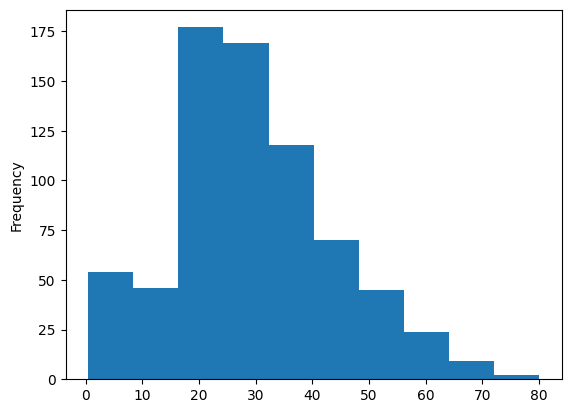

In [14]:
df['Age'].plot.hist()

In [15]:
# Age correlaction with Survived
df[['Age','Survived']].corr()

,Age,Survived
Age,1.000000,-0.077221
Survived,-0.077221,1.000000


<Axes: xlabel='Age'>

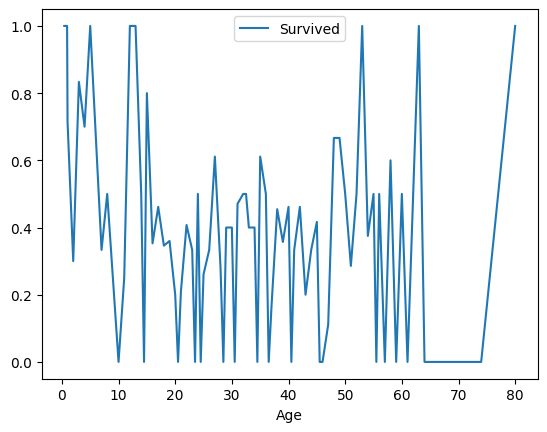

In [16]:
# Conditional probability P(Survived = 1 | Age)
df[['Age','Survived']].groupby('Age').mean().plot()

In [17]:
df['SibSp'].value_counts().sort_values()

SibSp
5      5
8      7
3     16
4     18
2     28
1    209
0    608
Name: count, dtype: int64

In [18]:
# Conditional probability P(Survived = 1 | SibSp)
df[['SibSp','Survived']].groupby('SibSp').mean().sort_values(by='Survived', ascending=False)

,Survived
SibSp,
1,0.535885
2,0.464286
0,0.345395
3,0.250000
4,0.166667
5,0.000000
8,0.000000


In [19]:
# Correlation excluding people that were alone
sibSpPos = df['SibSp'] > 0
df[sibSpPos][['SibSp','Survived']].corr()

,SibSp,Survived
SibSp,1.000000,-0.279071
Survived,-0.279071,1.000000


In [20]:
df['Parch'].value_counts().sort_values()

Parch
6      1
4      4
5      5
3      5
2     80
1    118
0    678
Name: count, dtype: int64

<Axes: xlabel='Parch'>

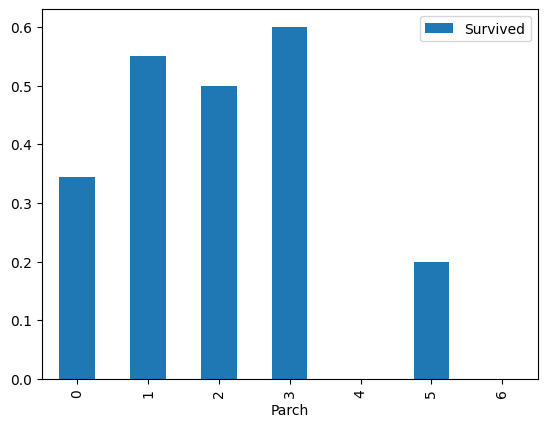

In [21]:
# Conditional probability P(Survived = 1 | Parch)
parchDist = df[['Parch','Survived']].groupby('Parch').mean().sort_values(by='Parch', ascending=True)
parchDist.plot.bar()

In [22]:
df['Ticket'].describe()

count        891
unique       681
top       347082
freq           7
Name: Ticket, dtype: object

In [23]:
df['Ticket'].head()

0           A/5 21171
1            PC 17599
2    STON/O2. 3101282
3              113803
4              373450
Name: Ticket, dtype: object

In [24]:
1 - len(df['Ticket'].unique())/len(df)

0.23569023569023573

In [25]:
df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

<Axes: >

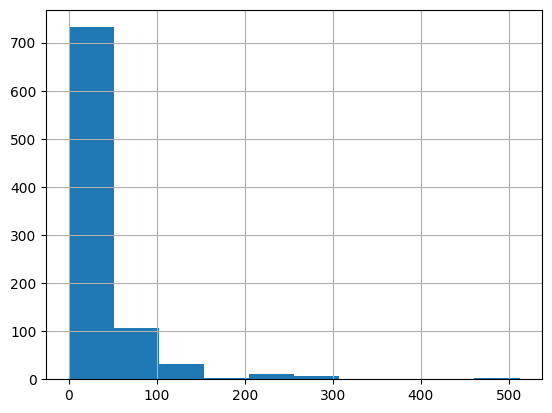

In [26]:
df['Fare'].hist()

In [27]:
df[['Pclass','Fare']].corr()

,Pclass,Fare
Pclass,1.0000,-0.5495
Fare,-0.5495,1.0000


In [28]:
df[['Pclass','Fare']].groupby('Pclass').mean()

,Fare
Pclass,
1,84.154687
2,20.662183
3,13.675550


In [29]:
df['Cabin'].isnull().sum()/len(df)

0.7710437710437711

In [30]:
df['Cabin'].describe()

count         204
unique        147
top       B96 B98
freq            4
Name: Cabin, dtype: object

In [31]:
df[['Pclass','Cabin']].groupby('Pclass').count()

,Cabin
Pclass,
1,176
2,16
3,12


In [32]:
df['WithCabin'] = ~df['Cabin'].isnull()
df['WithCabin'].value_counts()

WithCabin
False    687
True     204
Name: count, dtype: int64

In [33]:
df[['WithCabin', 'Survived']].groupby('WithCabin').mean()

,Survived
WithCabin,
False,0.299854
True,0.666667


In [34]:
df['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [35]:
df[['Embarked','Survived']].groupby('Embarked').mean().sort_values('Survived', ascending=False)

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


In [36]:
df[['Embarked','Pclass','Survived']].groupby(['Embarked','Pclass']).count()

Survived
Embarked Pclass          
C        1             85
         2             17
         3             66
Q        1              2
         2              3
         3             72
S        1            127
         2            164
         3            353

### Features

Training data: 891 instances.

- `PassengerId`: does not carry any information. Discard.
- `Survived`: LABEL, nominal, already encoded 0 = No (61.6%), 1 = Yes (38.4%). **Class Imbalance**
- `Pclass`: ticket class, ordinal, imbalanced. As expected, the survival rate is correlated with the class: First class (1) at 62%, second (1) at 47%, third at 24%. The order is meaniful.
- `Name`: string, nominal, includes the title like 'Mr.', 'Miss", etc... Could be used to fix the age column.
- `Sex`: string, nominal. 'male' 64.7%, 'female' 35.3% on whole data. Survival rate 'male' 19%, 'female' 74%.
- `Age`: continuos, ratio. **20% missing**. Not normal distribution, not strong direct correlation with survived. Could be imputed using the title from 'Name'. It seems babies and elders have an higher survival rate, maybe because of priority in lifeboats.
- `SibSp`: number of siblings / spouses aboard the Titanic. Ordinal. There is an inverse correlation with survived if value 0 is excluded. Maybe a feature 'Alone' can be extracted.
- `Parch`: number of parents / children aboard the Titanic. Ordinal. It carries information, but not linear. Maybe it can be encoded as nominal classes, since the order is not correlated to survival rate.
- `Ticket`: string, nominal. 24% of the ticket are shared. There are prefix that could correlate with survived. Further investigation needed.
- `Fare`: ticket price. Continuous, ratio. Inversely correlated with 'Pclass' (as expected), distribution very skewed to the right, low price. It could be used to reinforce the class signal, but it must be scaled properly.
- `Cabin`: string, nominal. 77% missing value. Most of cabins assigned to first class. Having a cabin rise the survival rate to 66%.
- `Embarked`: Port of Embarkation. C = Cherbourg, Q = Queenstown, S = Southampton. Nominal. 2 missing values. Most of passenger embarked at S, but C has higher probability of survival. It can be explained by the class distribution in the embarking process.

## Feature Analysis and Engineering

In [37]:
engDf = df

In [38]:
# Remove PassengerId
engDf = engDf.drop('PassengerId', axis=1)

In [39]:
from sklearn.preprocessing import MinMaxScaler

In [40]:
pclassScaler = MinMaxScaler()
engDf['PclassScaled'] = pclassScaler.fit_transform(engDf.Pclass.values.reshape(-1,1))


### Name -> Title -> Age

In [41]:
engDf['Name'].head(10)

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
5                                     Moran, Mr. James
6                              McCarthy, Mr. Timothy J
7                       Palsson, Master. Gosta Leonard
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                  Nasser, Mrs. Nicholas (Adele Achem)
Name: Name, dtype: object

In [42]:
# Extract title (test)
engDf['Name'].head(10).str.extract(r'\w*,\s*(\w+)\.')

,0
0,Mr
1,Mrs
2,Miss
3,Mrs
4,Mr
5,Mr
6,Mr
7,Master
8,Mrs
9,Mrs


In [43]:
titles = engDf['Name'].str.extract(r'\w*,\s*(\w+)\.')
titles.value_counts()

0       
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Major         2
Mlle          2
Capt          1
Don           1
Jonkheer      1
Lady          1
Mme           1
Ms            1
Sir           1
Name: count, dtype: int64

In [44]:
# Save as feature
engDf['Title'] = titles

In [45]:
# Connect title with age
titleAge = engDf[~engDf.Age.isnull()][['Title','Age']].groupby('Title').median()
titleAge

,Age
Title,
Capt,70.0
Col,58.0
Don,40.0
Dr,46.5
Jonkheer,38.0
Lady,48.0
Major,48.5
Master,3.5
Miss,21.0


In [46]:
engDf[engDf.Age.isnull()]['Title'].value_counts()

Title
Mr        119
Miss       36
Mrs        17
Master      4
Dr          1
Name: count, dtype: int64

In [47]:
# Use the title median age to imput the missing age
engDf['Age'] = engDf['Age'].fillna(engDf['Title'].map(titleAge.Age))

<Axes: ylabel='Frequency'>

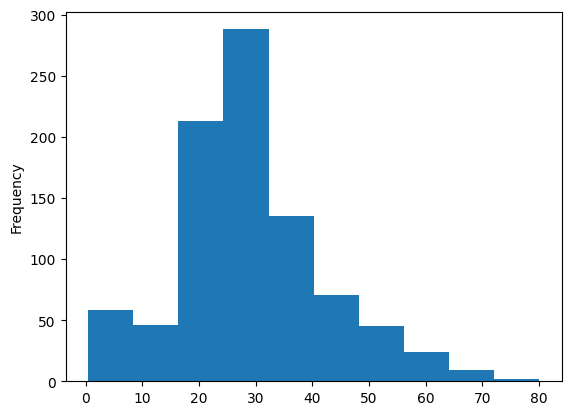

In [48]:
engDf.Age.plot.hist()

In [49]:
from sklearn.preprocessing import StandardScaler

<Axes: ylabel='Frequency'>

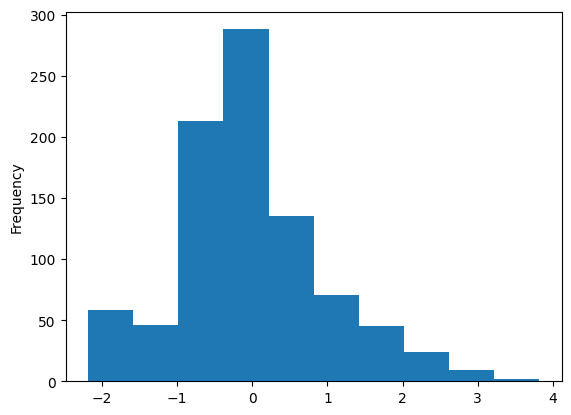

In [50]:
ageScaler = StandardScaler()
engDf['AgeScaled'] = ageScaler.fit_transform(engDf.Age.values.reshape(-1,1))
engDf.AgeScaled.plot.hist()

Let's try to include alse the title in the features list

In [51]:
engDf['Title'].value_counts()

Title
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Mlle          2
Col           2
Don           1
Mme           1
Ms            1
Lady          1
Sir           1
Capt          1
Jonkheer      1
Name: count, dtype: int64

In [111]:
# Restrict to category with enough data
titleCat = {'Mr','Miss','Mrs','Master'}

engDf['Title'] = engDf['Title'].replace('Mlle', 'Miss')
engDf['Title'] = engDf['Title'].replace('Ms', 'Miss')
engDf['Title'] = engDf['Title'].replace('Mme', 'Mrs')
# overwrite the small or unknown title with 'X'
# Replace values where the condition is False.
titleMask = engDf.Title.isin(titleCat)
engDf['TitleCategory'] = engDf['Title'].where(titleMask, 'X')

In [112]:
engDf[['TitleCategory', 'Survived']].groupby('TitleCategory').mean().sort_values(by='Survived', ascending=False)

,Survived
TitleCategory,
Mrs,0.793651
Miss,0.702703
Master,0.575000
X,0.347826
Mr,0.156673


In [54]:
# One-hot encode FamilyCategory
engDf = engDf.join(pd.get_dummies(engDf['TitleCategory'], prefix='Title'))
engDf.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked', 'WithCabin', 'PclassScaled', 'Title',
       'AgeScaled', 'TitleCategory', 'Title_Master', 'Title_Miss', 'Title_Mr',
       'Title_Mrs', 'Title_X'],
      dtype='object')

### Sex

The feature is OK, just one hot encode it.

In [55]:
from sklearn.preprocessing import LabelEncoder

In [56]:
sexLE = LabelEncoder()
sexLE.fit(engDf['Sex'])
sexLE.transform(['male','female'])

array([1, 0])

In [57]:
engDf['Male'] = sexLE.transform(engDf['Sex'])
engDf['Male'].value_counts()

Male
1    577
0    314
Name: count, dtype: int64

In [58]:
# Double check the conversion
engDf[['Male','Survived']].groupby('Male').mean().sort_values(by='Survived', ascending=False)

,Survived
Male,
0,0.742038
1,0.188908


### Family

The columns `SibSp` and `Parch` carry information about the family size and it seems to have an impact on the survival rate. The two information could be merged into one feature, 

In [59]:
# family sibling + parent
engDf['FamilySize'] = engDf['SibSp'] + engDf['Parch']
engDf['FamilySize'].value_counts()

FamilySize
0     537
1     161
2     102
3      29
5      22
4      15
6      12
10      7
7       6
Name: count, dtype: int64

In [60]:
engDf[['FamilySize','Survived']].groupby('FamilySize').mean().sort_values(by='Survived')

,Survived
FamilySize,
7,0.000000
10,0.000000
5,0.136364
4,0.200000
0,0.303538
6,0.333333
1,0.552795
2,0.578431
3,0.724138


<Axes: xlabel='FamilySize'>

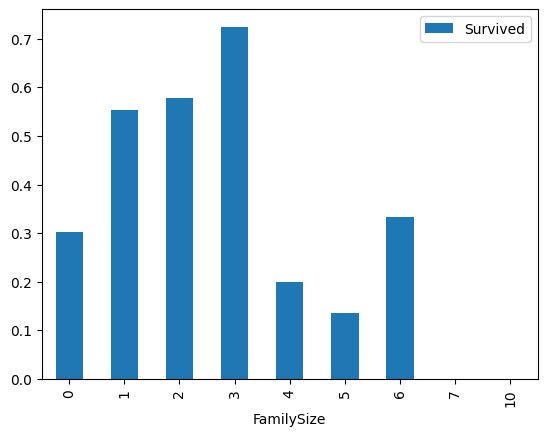

In [61]:
engDf[['FamilySize','Survived']].groupby('FamilySize').mean().sort_values(by='FamilySize').plot.bar()

In [62]:
# Investigate the 6 composition
engDf[engDf['FamilySize'] == 6][['Age','Sex','SibSp','Parch']]

,Age,Sex,SibSp,Parch
13,39.0,male,1,5
25,38.0,female,1,5
68,17.0,female,4,2
119,2.0,female,4,2
182,9.0,male,4,2
233,5.0,female,4,2
261,3.0,male,4,2
541,9.0,female,4,2
542,11.0,female,4,2
610,39.0,female,1,5


<Axes: xlabel='FamilySize'>

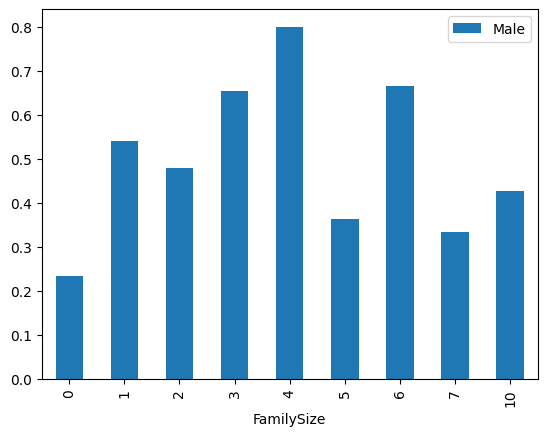

In [63]:
# Impact of Sex (Male) on the FamilySize survival rate
familyMale = engDf[['FamilySize','Male']].groupby('FamilySize').mean()
familyFemale = 1 - familyMale
familyFemale.plot.bar()

It seems the family size survival rate is correlated with Sex only for alone person.
The family size should be used as feature, but let's try to encode it in groups.

In [64]:
alone = engDf['FamilySize'] == 0
smallFamily = engDf['FamilySize'].between(1,3)
bigFamily = engDf['FamilySize'] > 3

conditions = [alone, smallFamily, bigFamily]
choices = ['Alone', 'Small', 'Big']

engDf['FamilyCategory'] = np.select(conditions, choices, default=-1)

# check that no -1 present
engDf['FamilyCategory'].value_counts()

FamilyCategory
Alone    537
Small    292
Big       62
Name: count, dtype: int64

<Axes: xlabel='FamilyCategory'>

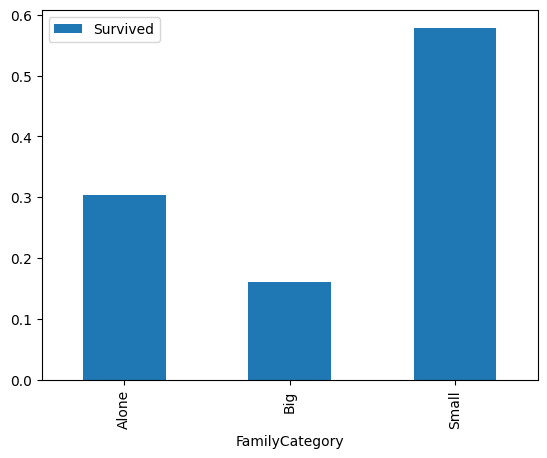

In [65]:
# Conditional Probabilty P(Survived | FamilyCategory)
engDf[['FamilyCategory','Survived']].groupby('FamilyCategory').mean().plot.bar()

In this case it is better to one-hot encode the category because, even if there is an underline order, it does not correlate with the survivale rate.

In [66]:
# One-hot encode FamilyCategory
engDf = engDf.join(pd.get_dummies(engDf['FamilyCategory'], prefix='Family'))

### Ticket

In [67]:
engDf['Ticket'].head(10)

0           A/5 21171
1            PC 17599
2    STON/O2. 3101282
3              113803
4              373450
5              330877
6               17463
7              349909
8              347742
9              237736
Name: Ticket, dtype: object

In [68]:
engDf['TicketPrefix'] = engDf['Ticket'].str.extract(r"(.+) .+")

In [69]:
engDf['TicketPrefix'].value_counts()

TicketPrefix
PC             60
C.A.           27
STON/O 2.      12
A/5            10
W./C.           9
CA.             8
SOTON/O.Q.      8
A/5.            7
SOTON/OQ        7
STON/O2.        6
CA              6
F.C.C.          5
C               5
SC/PARIS        5
S.O.C.          5
SC/Paris        4
A/4.            3
S.O./P.P.       3
PP              3
A/4             3
A.5.            2
S.C./PARIS      2
SOTON/O2        2
P/PP            2
SC/AH           2
WE/P            2
A./5.           2
SC/AH Basle     1
SO/C            1
S.W./PP         1
F.C.            1
A/S             1
SW/PP           1
SC              1
SCO/W           1
W/C             1
Fa              1
S.O.P.          1
S.C./A.4.       1
A4.             1
S.P.            1
W.E.P.          1
C.A./SOTON      1
Name: count, dtype: int64

In [70]:
engDf['WithTicketPrefix'] = ~engDf['TicketPrefix'].isnull()
engDf[['WithTicketPrefix','Survived']].groupby('WithTicketPrefix').mean()

,Survived
WithTicketPrefix,
False,0.383459
True,0.384956


The Ticket does not carry any information. If there are some insights on the prefix, there are a few instances to learn from, too noisy. Ticket will be discarded.

In [71]:
# Remove Ticket columns
engDf = engDf.drop(['Ticket','TicketPrefix','WithTicketPrefix'], axis=1)
engDf.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Cabin', 'Embarked', 'WithCabin', 'PclassScaled', 'Title', 'AgeScaled',
       'TitleCategory', 'Title_Master', 'Title_Miss', 'Title_Mr', 'Title_Mrs',
       'Title_X', 'Male', 'FamilySize', 'FamilyCategory', 'Family_Alone',
       'Family_Big', 'Family_Small'],
      dtype='object')

### Fare

<Axes: >

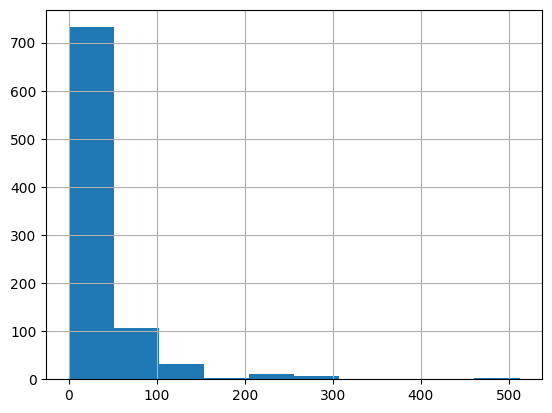

In [72]:
engDf['Fare'].hist()

In [73]:
import matplotlib.pyplot as plt

In [74]:
engDf.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

<Axes: ylabel='Frequency'>

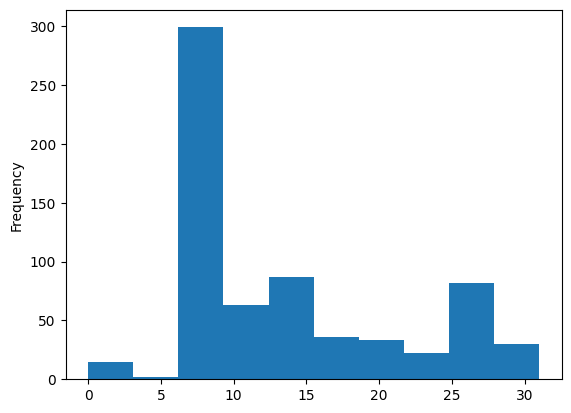

In [75]:
engDf[engDf.Fare <= 31]['Fare'].plot.hist()

/tmp/ipykernel_36/3702206847.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fareRatio = engDf[['Fare_Bins', 'Survived']].groupby('Fare_Bins').mean()


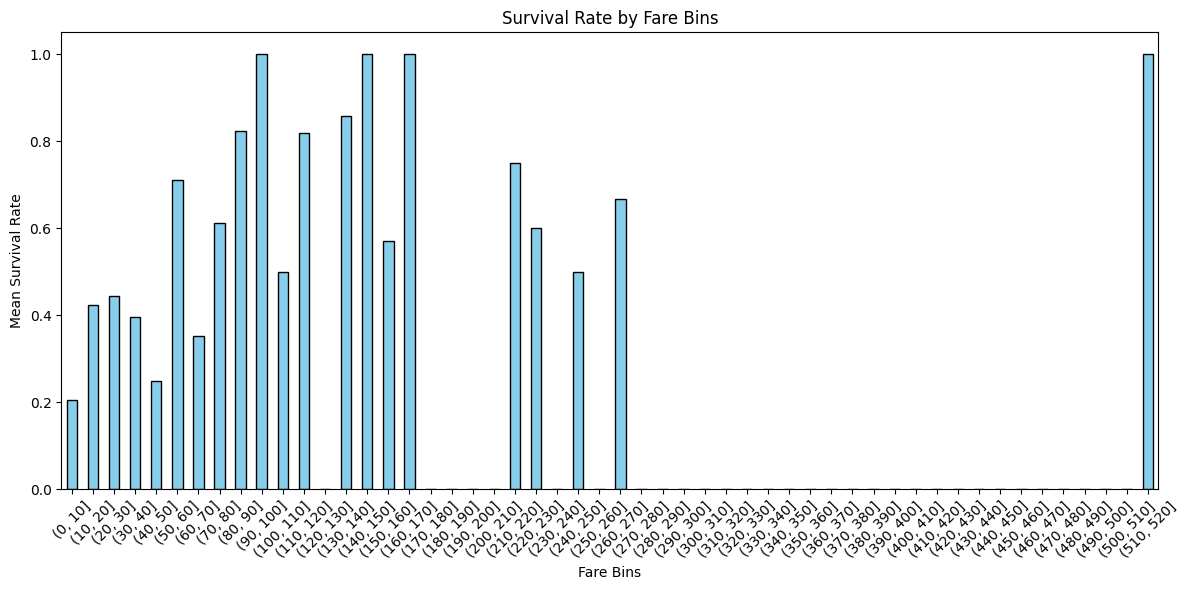

In [143]:
engDf['Fare_Bins'] = pd.cut(engDf['Fare'], bins=range(0, int(engDf['Fare'].max()) + 10, 10))

# Calculate mean survival rate for each fare bin
fareRatio = engDf[['Fare_Bins', 'Survived']].groupby('Fare_Bins').mean()

# Create the bar chart
plt.figure(figsize=(12, 6))
fareRatio['Survived'].plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Survival Rate by Fare Bins')
plt.xlabel('Fare Bins')
plt.ylabel('Mean Survival Rate')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/tmp/ipykernel_36/2377216033.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fareRatio = engDf[['Fare_Bins', 'Survived']].groupby('Fare_Bins').count()


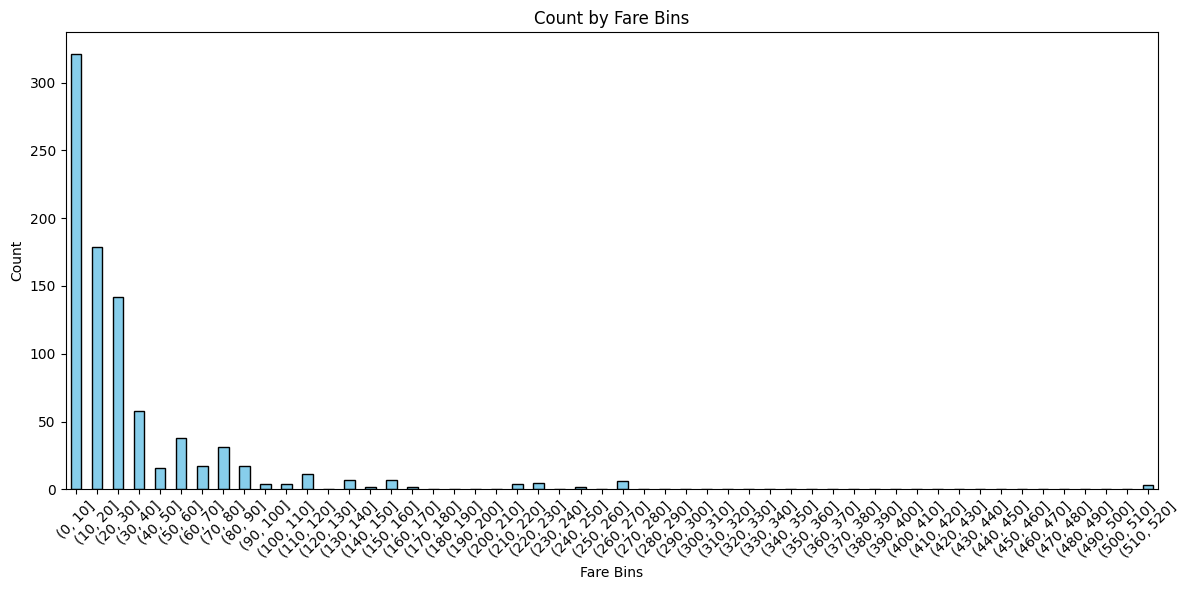

In [144]:
# Calculate fare distribution
fareRatio = engDf[['Fare_Bins', 'Survived']].groupby('Fare_Bins').count()

# Create the bar chart
plt.figure(figsize=(12, 6))
fareRatio['Survived'].plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Count by Fare Bins')
plt.xlabel('Fare Bins')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [127]:
engDf['FareCategory'] = pd.cut(engDf['Fare'], bins=[0,7.91,14.45,31,120], labels=['low','median','avg','high'])
engDf[['FareCategory','Survived']].groupby('FareCategory').mean()

/tmp/ipykernel_36/1857505655.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  engDf[['FareCategory','Survived']].groupby('FareCategory').mean()


,Survived
FareCategory,
low,0.206731
median,0.308756
avg,0.445415
high,0.548913


In [76]:
for q  in [0.25, 0.50, 0.75]:
    quant = engDf.Fare.quantile(q)
    below = engDf[engDf.Fare < quant]['Survived'].mean()
    above = engDf[engDf.Fare >= quant]['Survived'].mean()
    print(f"Quantile {q}: {below:.04f} / {above:.04f}")

Quantile 0.25: 0.1973 / 0.4461
Quantile 0.5: 0.2523 / 0.5122
Quantile 0.75: 0.3168 / 0.5822


Let's use the median (q=0.50) to create a binary category for Fare.

In [77]:
fareMedian = engDf.Fare.median()
fareLow = engDf.Fare < fareMedian
fareHigh = engDf.Fare >= fareMedian

conditions = [fareLow, fareHigh]
choices = [0, 1] # one-hot encoding

engDf['FareCategory'] = np.select(conditions, choices, default=-1)

# check that no -1 present
engDf['FareCategory'].value_counts()


FareCategory
1    451
0    440
Name: count, dtype: int64

In [78]:
engDf[['FareCategory','Survived']].groupby('FareCategory').mean()

,Survived
FareCategory,
0,0.252273
1,0.512195


Let's try do better, normalizing the distribution using Box-Cox

In [79]:
from scipy.stats import boxcox

In [80]:
# Since there are zero Fare anc Box-Cox can be applied only for strictly positive values, let's cheat
fareCox, lmbda = boxcox(engDf.Fare + 0.0001)
lmbda

0.22502939872547123

(array([ 15.,   0.,   0., 349., 258., 144.,  80.,  25.,  17.,   3.]),
 array([-3.88456596, -2.1312858 , -0.37800564,  1.37527452,  3.12855468,
         4.88183484,  6.635115  ,  8.38839516, 10.14167532, 11.89495548,
        13.64823564]),
 <BarContainer object of 10 artists>)

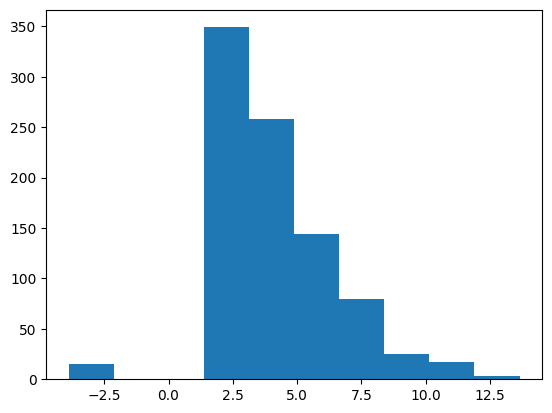

In [81]:
plt.hist(fareCox)

### Cabin

In [82]:
engDf['WithCabin'] = ~engDf.Cabin.isnull() * 1

In [83]:
# Check relation with Fare
engDf[['WithCabin','FareCategory','Survived']].groupby(['WithCabin','FareCategory']).mean()

Survived
WithCabin FareCategory          
0         0             0.237981
          1             0.394834
1         0             0.500000
          1             0.688889

### Embarked

Fix the missing values and one-hot encode the 3 categories.

In [84]:
engDf[engDf['Embarked'].isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,...,Title_Mr,Title_Mrs,Title_X,Male,FamilySize,FamilyCategory,Family_Alone,Family_Big,Family_Small,FareCategory
61,1,1,"Icard, Miss. Amelie",female,38.0,0,0,80.0,B28,NaN,...,False,False,False,0,0,Alone,True,False,False,1
829,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,80.0,B28,NaN,...,False,True,False,0,0,Alone,True,False,False,1


In [85]:
# Since there are just 2 instances and it is not clear how to correlate the Embarked, set the major one
engDf['Embarked'] = engDf.Embarked.fillna(engDf.Embarked.mode())

In [86]:
# One-hot encoding
engDf = engDf.join(pd.get_dummies(engDf['Embarked'], prefix='Embarked'))


In [87]:
engDf.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Cabin', 'Embarked', 'WithCabin', 'PclassScaled', 'Title', 'AgeScaled',
       'TitleCategory', 'Title_Master', 'Title_Miss', 'Title_Mr', 'Title_Mrs',
       'Title_X', 'Male', 'FamilySize', 'FamilyCategory', 'Family_Alone',
       'Family_Big', 'Family_Small', 'FareCategory', 'Embarked_C',
       'Embarked_Q', 'Embarked_S'],
      dtype='object')

### Engineered Dataset

Collect all the pre-prossesing steps in a function for applying the pipeline also to the test set.

In [145]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

def family(engDf):
    engDf['FamilySize'] = engDf['SibSp'] + engDf['Parch']
    alone = engDf['FamilySize'] == 0
    smallFamily = engDf['FamilySize'].between(1,3)
    bigFamily = engDf['FamilySize'] > 3
    
    conditions = [alone, smallFamily, bigFamily]
    choices = ['Alone', 'Small', 'Big']
    
    engDf['FamilyCategory'] = np.select(conditions, choices, default=-1)
    # One-hot encode FamilyCategory
    engDf = engDf.join(pd.get_dummies(engDf['FamilyCategory'], prefix='Family'))

    return engDf

def title(df):
    titleCat = {'Mr','Miss','Mrs','Master'}
    df['Title'] = df['Title'].replace('Mlle', 'Miss')
    df['Title'] = df['Title'].replace('Ms', 'Miss')
    df['Title'] = df['Title'].replace('Mme', 'Mrs')
    # overwrite the small or unknown title with 'X'
    # Replace values where the condition is False.
    titleMask = df.Title.isin(titleCat)
    df['TitleCategory'] = df['Title'].where(titleMask, 'X')
    return df.join(pd.get_dummies(df['TitleCategory'], prefix='Title'))

def fare(df, fareMedian):
    # imput one missing value in the test set
    df['Fare'] = df.Fare.fillna(fareMedian)
    
    #fareLow = df.Fare < fareMedian
    #fareHigh = df.Fare >= fareMedian
    
    #conditions = [fareLow, fareHigh]
    #choices = [0, 1] # one-hot encoding
    
    #df['FareCategory'] = np.select(conditions, choices, default=-1)

    df['FareCategory'] = pd.cut(df['Fare'], bins=[0,7.91,14.45,31,120], labels=['low','median','avg','high'])

    fareCox, lmbda = boxcox(df.Fare + 0.0001)
    df['FareScaled'] = fareCox
    return df.join(pd.get_dummies(df['FareCategory'], prefix='Fare'))
    
def preprocessing(train, test):
    """
    Use the train dataframe to configure the process and then apply it on the test set.
    """

    # Pclass
    pclassScaler = MinMaxScaler()
    pclassScaler.fit(train.Pclass.values.reshape(-1,1))
    
    train['PclassScaled'] = pclassScaler.transform(train.Pclass.values.reshape(-1,1))
    test['PclassScaled'] = pclassScaler.transform(test.Pclass.values.reshape(-1,1))

    # Age
    train['Title'] = train['Name'].str.extract(r'\w*,\s*(\w+)\.')
    test['Title'] = test['Name'].str.extract(r'\w*,\s*(\w+)\.')
    # Connect title with age
    titleAge = train[~train.Age.isnull()][['Title','Age']].groupby('Title').median()
    # Use the title median age to imput the missing age
    train['Age'] = train['Age'].fillna(train['Title'].map(titleAge.Age))
    test['Age'] = test['Age'].fillna(test['Title'].map(titleAge.Age))

    ageScaler = StandardScaler()
    train['AgeScaled'] = ageScaler.fit_transform(train.Age.values.reshape(-1,1))
    test['AgeScaled'] = ageScaler.fit_transform(test.Age.values.reshape(-1,1))

    # Title
    train = title(train)
    test = title(test)

    # Sex
    sexLE = LabelEncoder()
    sexLE.fit(train['Sex'])
    train['Male'] = sexLE.transform(train['Sex'])
    test['Male'] = sexLE.transform(test['Sex'])

    # Family
    train = family(train)
    test = family(test)

    # Ticket is discarded
    
    # Fare
    fareMedian = train.Fare.median()
    train = fare(train, fareMedian)
    test = fare(test, fareMedian)

    # Cabin
    train['WithCabin'] = ~train.Cabin.isnull() * 1
    test['WithCabin'] = ~test.Cabin.isnull() * 1
    
    # Embarked
    embarkedMode = train.Embarked.mode()
    train['Embarked'] = train.Embarked.fillna(embarkedMode)
    train = train.join(pd.get_dummies(train['Embarked'], prefix='Embarked'))
    test['Embarked'] = test.Embarked.fillna(embarkedMode)
    test = test.join(pd.get_dummies(test['Embarked'], prefix='Embarked'))

    # Setup
    columns = list(train.columns)
    familyCols = [c for c in columns if c.startswith('Family_')]
    embarkedCols = [c for c in columns if c.startswith('Embarked_')]
    titleCols = [c for c in columns if c.startswith('Title_')]
    fareCols = [c for c in columns if c.startswith('Fare_')] # unused, it works better without it
    
    features = ['PclassScaled', 'AgeScaled', 'WithCabin', 'Male',
                'FareScaled'] + familyCols + embarkedCols + titleCols
            
    label = ['Survived']
    
    X_train = train[features]
    y_train = train[label]
    X_test = test[features]

    return X_train, y_train, X_test

In [146]:
train = pd.read_csv("/kaggle/input/titanic/train.csv")
test = pd.read_csv("/kaggle/input/titanic/test.csv")

print("TRAIN missings:")
print(train.isnull().sum())

print("="*40)
print("TEST missings:")
print(test.isnull().sum())

TRAIN missings:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
TEST missings:
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


Reload for a fresh start

In [147]:
X_train, y_train, X_test = preprocessing(train, test)

print("X_train columns", X_train.columns)
print("X_test columns", X_test.columns)
print("y_train columns", y_train.columns)

print("X_train len",len(X_train), "y_train len", len(y_train))
print("X_test len",len(X_test))

X_train columns Index(['PclassScaled', 'AgeScaled', 'WithCabin', 'Male', 'FareScaled',
       'Family_Alone', 'Family_Big', 'Family_Small', 'Embarked_C',
       'Embarked_Q', 'Embarked_S', 'Title_Master', 'Title_Miss', 'Title_Mr',
       'Title_Mrs', 'Title_X'],
      dtype='object')
X_test columns Index(['PclassScaled', 'AgeScaled', 'WithCabin', 'Male', 'FareScaled',
       'Family_Alone', 'Family_Big', 'Family_Small', 'Embarked_C',
       'Embarked_Q', 'Embarked_S', 'Title_Master', 'Title_Miss', 'Title_Mr',
       'Title_Mrs', 'Title_X'],
      dtype='object')
y_train columns Index(['Survived'], dtype='object')
X_train len 891 y_train len 891
X_test len 418


## Model

I think an ensamble will do the job.

In [91]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC


In [92]:
# Few data, use a cross validation. Stratified because of class imbalance
kfold = StratifiedKFold(n_splits=10)

### Logistic Regression

In [93]:
def validate(model):
    global X_train, y_train
    scores = cross_val_score(model, X_train, y_train.values.ravel(), cv=kfold, scoring='accuracy')
    mean = np.mean(scores)
    std = np.std(scores)
    print("Model", model)
    print(f"Mean {mean:.4f}, std: {std:.4f}")
    

In [148]:
#lr_model = LogisticRegression(class_weight='balanced', random_state=42, solver='liblinear', max_iter=100)
lr_model = LogisticRegression(solver='liblinear', random_state=42)
validate(lr_model)

Model LogisticRegression(random_state=42, solver='liblinear')
Mean 0.8294, std: 0.0376


In [149]:
rf_params = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 1, 3, 5],
    'criterion': ['gini','entropy'],
    'random_state': [42]
}

rf_model = RandomForestClassifier()
grid = GridSearchCV(rf_model, rf_params, cv=kfold, scoring='accuracy')
grid.fit(X_train, y_train.values.ravel())

grid.best_score_, grid.best_params_

(0.8406367041198501,
 {'criterion': 'gini', 'max_depth': 5, 'n_estimators': 50, 'random_state': 42})

In [118]:
rf_model = grid.best_estimator_
rf_model

RandomForestClassifier(criterion='entropy', max_depth=5, n_estimators=150,
                       random_state=42)

In [150]:
ada_params = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [1.0, 0.1, 0.01, 0.001],
    'random_state': [42]
}

ada_model = AdaBoostClassifier()
grid = GridSearchCV(ada_model, ada_params, cv=kfold, scoring='accuracy')
grid.fit(X_train, y_train.values.ravel())

grid.best_score_, grid.best_params_

(0.8316604244694134,
 {'learning_rate': 0.1, 'n_estimators': 100, 'random_state': 42})

In [120]:
#8316604244694134
ada_model = grid.best_estimator_
ada_model

AdaBoostClassifier(learning_rate=0.1, n_estimators=100, random_state=42)

In [151]:
svc_model = SVC(random_state=42, probability=True)
validate(svc_model)

Model SVC(probability=True, random_state=42)
Mean 0.8328, std: 0.0346


In [152]:
boost_model = GradientBoostingClassifier()
validate(boost_model)

Model GradientBoostingClassifier()
Mean 0.8429, std: 0.0385


### Ensamble

In [153]:
ensemble = VotingClassifier(estimators=[
    ('LR',lr_model), 
    ('RF',rf_model), 
    ('ADA',ada_model), 
    ('SVC',svc_model), 
    ('BOOST',boost_model)], voting='soft')

ensemble = ensemble.fit(X_train, y_train.values.ravel())
#validate(ensemble)

In [102]:
from sklearn.metrics import accuracy_score

In [154]:
preds_train = ensemble.predict(X_train)
accuracy_score(y_train, preds_train)

0.8754208754208754

It cannot overfit the train set, but maybe it is OK.

## Submition

In [155]:
final_model = ensemble

In [156]:
preds_test = final_model.predict(X_test)

subDf = pd.DataFrame({
    'PassengerId': test['PassengerId'],
    'Survived': preds_test
})

subDf.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [157]:
subDf.to_csv('submission2.csv', index=False)

**GradBoost: 75%**

**Ensemble: 77%**